# Combining and Cleansing Rainfall Data

**For Dandenong and Monbulk**

_To utilise in Machine Learning_

In [1]:
# Dependencies 
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# List of file names to be combined 
rainfall_files = ['data/IDCJAC0009_086072_1800_Data.csv', 'data/IDCJAC0009_086224_1800_Data.csv','data/IDCJAC0009_086373_1800_Data.csv','data/IDCJAC0009_086090_1800_Data.csv']

# Create an empty list to store each dataframe
df_list = []

# Loop through each file in the list
for file in rainfall_files:
    # Read the file into a dataframe
    rainfall_df = pd.read_csv(file)

    # Append the dataframe to the list
    df_list.append(rainfall_df)

# Concatenate all dataframes in the list into one dataframe
rainfall_df = pd.concat(df_list)

stations_data = pd.read_csv('data/Station_Details.csv')

df = stations_data.merge(rainfall_df, on='Bureau of Meteorology station number')

# Show dataframe
df.head()

,Bureau of Meteorology station number,Location,Latitude,Longitude,Product code,Year,Month,Day,Rainfall amount (millimetres),Period over which rainfall was measured (days),Quality
0,86072,Monbulk,-37.88,145.42,IDCJAC0009,2012,1,1,0.0,NaN,Y
1,86072,Monbulk,-37.88,145.42,IDCJAC0009,2012,1,2,0.0,NaN,Y
2,86072,Monbulk,-37.88,145.42,IDCJAC0009,2012,1,3,0.0,NaN,Y
3,86072,Monbulk,-37.88,145.42,IDCJAC0009,2012,1,4,4.2,1.0,Y
4,86072,Monbulk,-37.88,145.42,IDCJAC0009,2012,1,5,1.0,1.0,Y


In [3]:
df['Bureau of Meteorology station number'].unique()


array([86072, 86224, 86373, 86090], dtype=int64)

In [4]:
print(df.isnull().mean())

Bureau of Meteorology station number              0.000000
Location                                          0.000000
Latitude                                          0.000000
Longitude                                         0.000000
Product code                                      0.000000
Year                                              0.000000
Month                                             0.000000
Day                                               0.000000
Rainfall amount (millimetres)                     0.068432
Period over which rainfall was measured (days)    0.502799
Quality                                           0.068445
dtype: float64


In [5]:
df.groupby(["Bureau of Meteorology station number"]).agg({'Year' : np.min})

,Year
Bureau of Meteorology station number,
86072,2012
86090,1915
86224,1960
86373,1994


In [6]:
# Drop rows where values are absent
df = df[df['Rainfall amount (millimetres)'] >= 0]
df = df[df['Year']>=2012] #to ensure both stations have same data

In [7]:
# Replace blank fields with 0
df['Period over which rainfall was measured (days)'] = df['Period over which rainfall was measured (days)'].fillna(0)
df.head()

,Bureau of Meteorology station number,Location,Latitude,Longitude,Product code,Year,Month,Day,Rainfall amount (millimetres),Period over which rainfall was measured (days),Quality
0,86072,Monbulk,-37.88,145.42,IDCJAC0009,2012,1,1,0.0,0.0,Y
1,86072,Monbulk,-37.88,145.42,IDCJAC0009,2012,1,2,0.0,0.0,Y
2,86072,Monbulk,-37.88,145.42,IDCJAC0009,2012,1,3,0.0,0.0,Y
3,86072,Monbulk,-37.88,145.42,IDCJAC0009,2012,1,4,4.2,1.0,Y
4,86072,Monbulk,-37.88,145.42,IDCJAC0009,2012,1,5,1.0,1.0,Y


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15504 entries, 0 to 78062
Data columns (total 11 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Bureau of Meteorology station number            15504 non-null  int64  
 1   Location                                        15504 non-null  object 
 2   Latitude                                        15504 non-null  float64
 3   Longitude                                       15504 non-null  float64
 4   Product code                                    15504 non-null  object 
 5   Year                                            15504 non-null  int64  
 6   Month                                           15504 non-null  int64  
 7   Day                                             15504 non-null  int64  
 8   Rainfall amount (millimetres)                   15504 non-null  float64
 9   Period over which rainfall was measured

In [9]:
# Creating a Series of datetime objects
date = pd.to_datetime(df[['Year', 'Month', 'Day']].rename(columns={'Year': 'Year', 'Month': 'Month', 'Day': 'Day'}))

# Assigning the date as a new column in the DataFrame
df['Date'] = date

#df = df.drop(columns =['Year','Month','Day'])

df.head()

,Bureau of Meteorology station number,Location,Latitude,Longitude,Product code,Year,Month,Day,Rainfall amount (millimetres),Period over which rainfall was measured (days),Quality,Date
0,86072,Monbulk,-37.88,145.42,IDCJAC0009,2012,1,1,0.0,0.0,Y,2012-01-01
1,86072,Monbulk,-37.88,145.42,IDCJAC0009,2012,1,2,0.0,0.0,Y,2012-01-02
2,86072,Monbulk,-37.88,145.42,IDCJAC0009,2012,1,3,0.0,0.0,Y,2012-01-03
3,86072,Monbulk,-37.88,145.42,IDCJAC0009,2012,1,4,4.2,1.0,Y,2012-01-04
4,86072,Monbulk,-37.88,145.42,IDCJAC0009,2012,1,5,1.0,1.0,Y,2012-01-05


In [10]:
# Add a new column 'RainfallCategory' based on the condition
df['Rainfall category'] = np.where(df['Rainfall amount (millimetres)'] <= 2, 0, 1)
df.head()

,Bureau of Meteorology station number,Location,Latitude,Longitude,Product code,Year,Month,Day,Rainfall amount (millimetres),Period over which rainfall was measured (days),Quality,Date,Rainfall category
0,86072,Monbulk,-37.88,145.42,IDCJAC0009,2012,1,1,0.0,0.0,Y,2012-01-01,0
1,86072,Monbulk,-37.88,145.42,IDCJAC0009,2012,1,2,0.0,0.0,Y,2012-01-02,0
2,86072,Monbulk,-37.88,145.42,IDCJAC0009,2012,1,3,0.0,0.0,Y,2012-01-03,0
3,86072,Monbulk,-37.88,145.42,IDCJAC0009,2012,1,4,4.2,1.0,Y,2012-01-04,1
4,86072,Monbulk,-37.88,145.42,IDCJAC0009,2012,1,5,1.0,1.0,Y,2012-01-05,0


In [11]:
df.describe()

,Bureau of Meteorology station number,Latitude,Longitude,Year,Month,Day,Rainfall amount (millimetres),Period over which rainfall was measured (days),Rainfall category
count,15504.000000,15504.000000,15504.000000,15504.000000,15504.000000,15504.000000,15504.000000,15504.000000,15504.000000
mean,86197.950916,-38.032854,145.405766,2017.176406,6.391318,15.733617,2.718705,0.651316,0.259739
std,122.642224,0.276231,0.198460,3.363318,3.426403,8.801332,6.250977,0.508270,0.438506
min,86072.000000,-38.460000,145.220000,2012.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,86072.000000,-38.460000,145.220000,2014.000000,3.000000,8.000000,0.000000,0.000000,0.000000
50%,86224.000000,-37.980000,145.310000,2017.000000,6.000000,16.000000,0.000000,1.000000,0.000000
75%,86373.000000,-37.880000,145.420000,2020.000000,9.000000,23.000000,2.200000,1.000000,1.000000
max,86373.000000,-37.710000,145.790000,2023.000000,12.000000,31.000000,77.400000,8.000000,1.000000


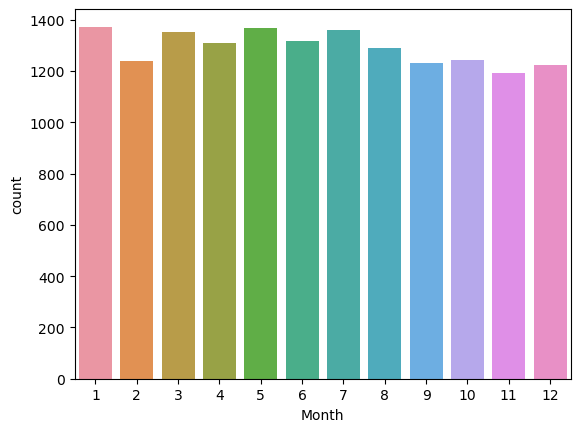

In [12]:
sns.countplot(x="Month", data=df)
plt.xlabel("Month")
plt.show()

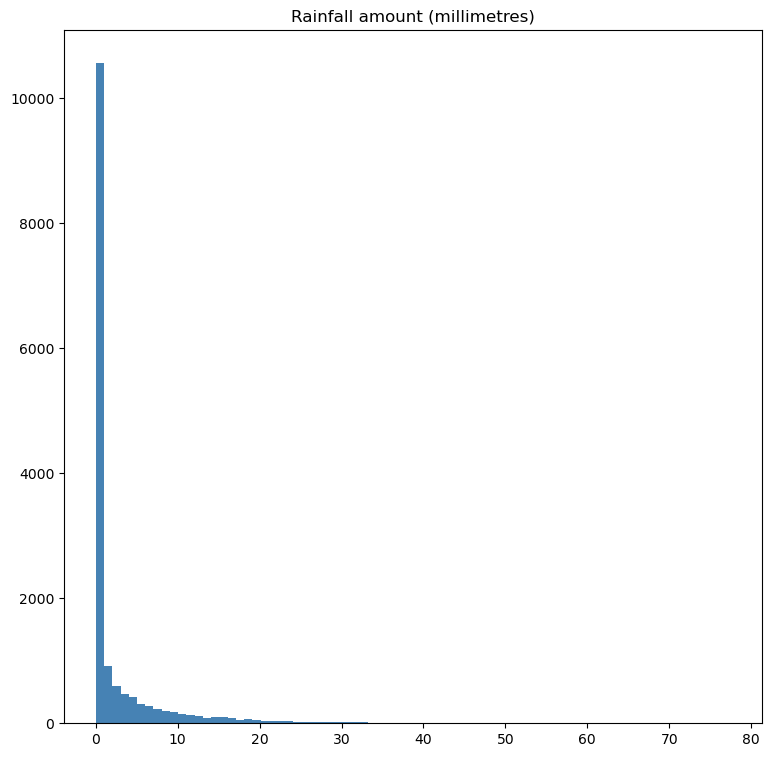

In [13]:
# visualise the distribution of daily rainfall
fig = df[[
          'Rainfall amount (millimetres)'
          ]].hist(bins=77,
                 color='steelblue',
                 xlabelsize=10, ylabelsize=10,
                 figsize=(9,9),
                 grid=False)

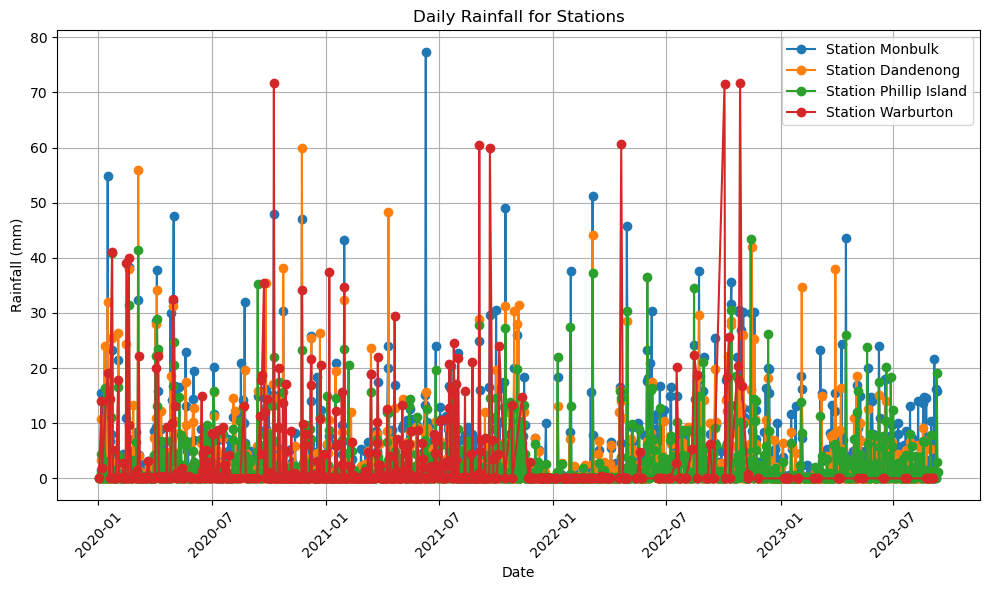

In [14]:
# Filter the DataFrame to include only dates after January 1, 2020
df_filtered = df[df['Date'] > '2020-01-01']

# Group the data by 'Station' and create separate plots for each station
stations = df['Location'].unique()

plt.figure(figsize=(10, 6))

for station in stations:
    station_data = df_filtered[df_filtered['Location'] == station]
    dates = pd.to_datetime(station_data['Date'])
    rainfall = station_data['Rainfall amount (millimetres)']
    
    plt.plot(dates, rainfall, label=f'Station {station}', marker='o', linestyle='-')

# Customize the plot
plt.xlabel('Date')
plt.ylabel('Rainfall (mm)')
plt.title('Daily Rainfall for Stations')
plt.grid(True)
plt.legend()

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()



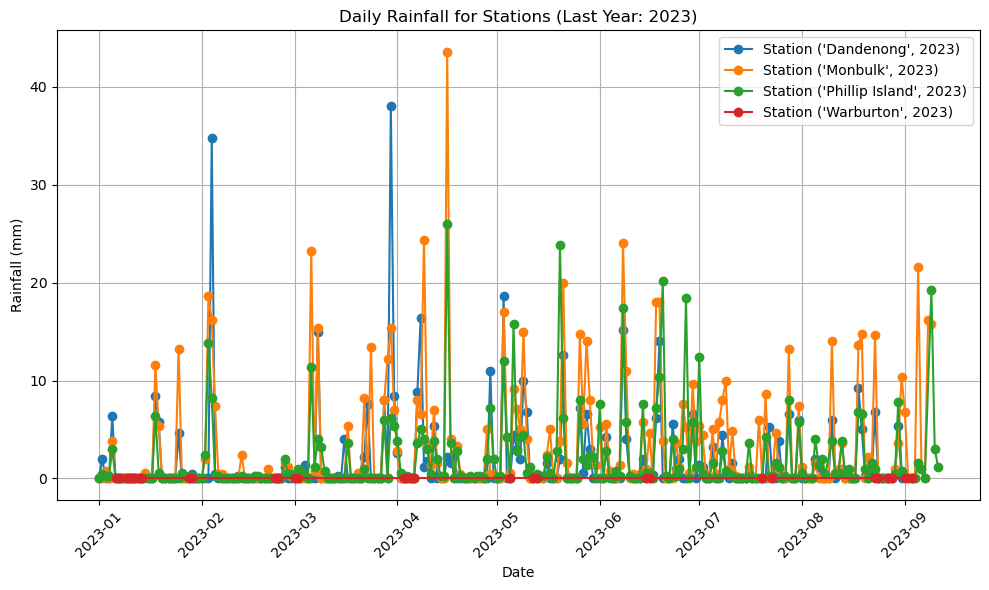

In [15]:
# Group the data by 'Station' and 'Year'
grouped = df.groupby(['Location', df['Date'].dt.year])

# Create a single chart with lines for each station
plt.figure(figsize=(10, 6))

for station, station_data in grouped:
    if station_data['Date'].dt.year.max() == df['Date'].dt.year.max():  # Filter for the last year
        dates = station_data['Date']
        rainfall = station_data['Rainfall amount (millimetres)']
        plt.plot(dates, rainfall, label=f'Station {station}', marker='o', linestyle='-')

# Customize the plot
plt.xlabel('Date')
plt.ylabel('Rainfall (mm)')
plt.title(f'Daily Rainfall for Stations (Last Year: {df["Date"].dt.year.max()})')
plt.grid(True)
plt.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

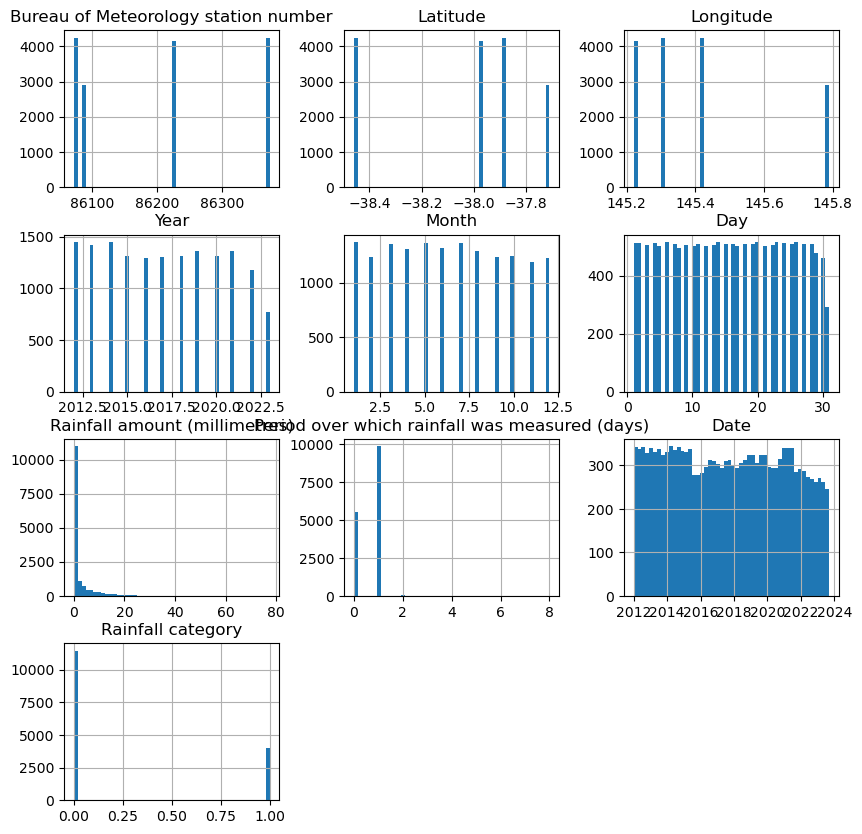

In [16]:
df.hist(figsize=(10,10),bins=50)
plt.show()

C:\Users\wicke\AppData\Local\Temp\ipykernel_5692\426396772.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrMatt=df.corr()
C:\Users\wicke\AppData\Local\Temp\ipykernel_5692\426396772.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),mask=mask,vmax=.8, square=True, annot=True)


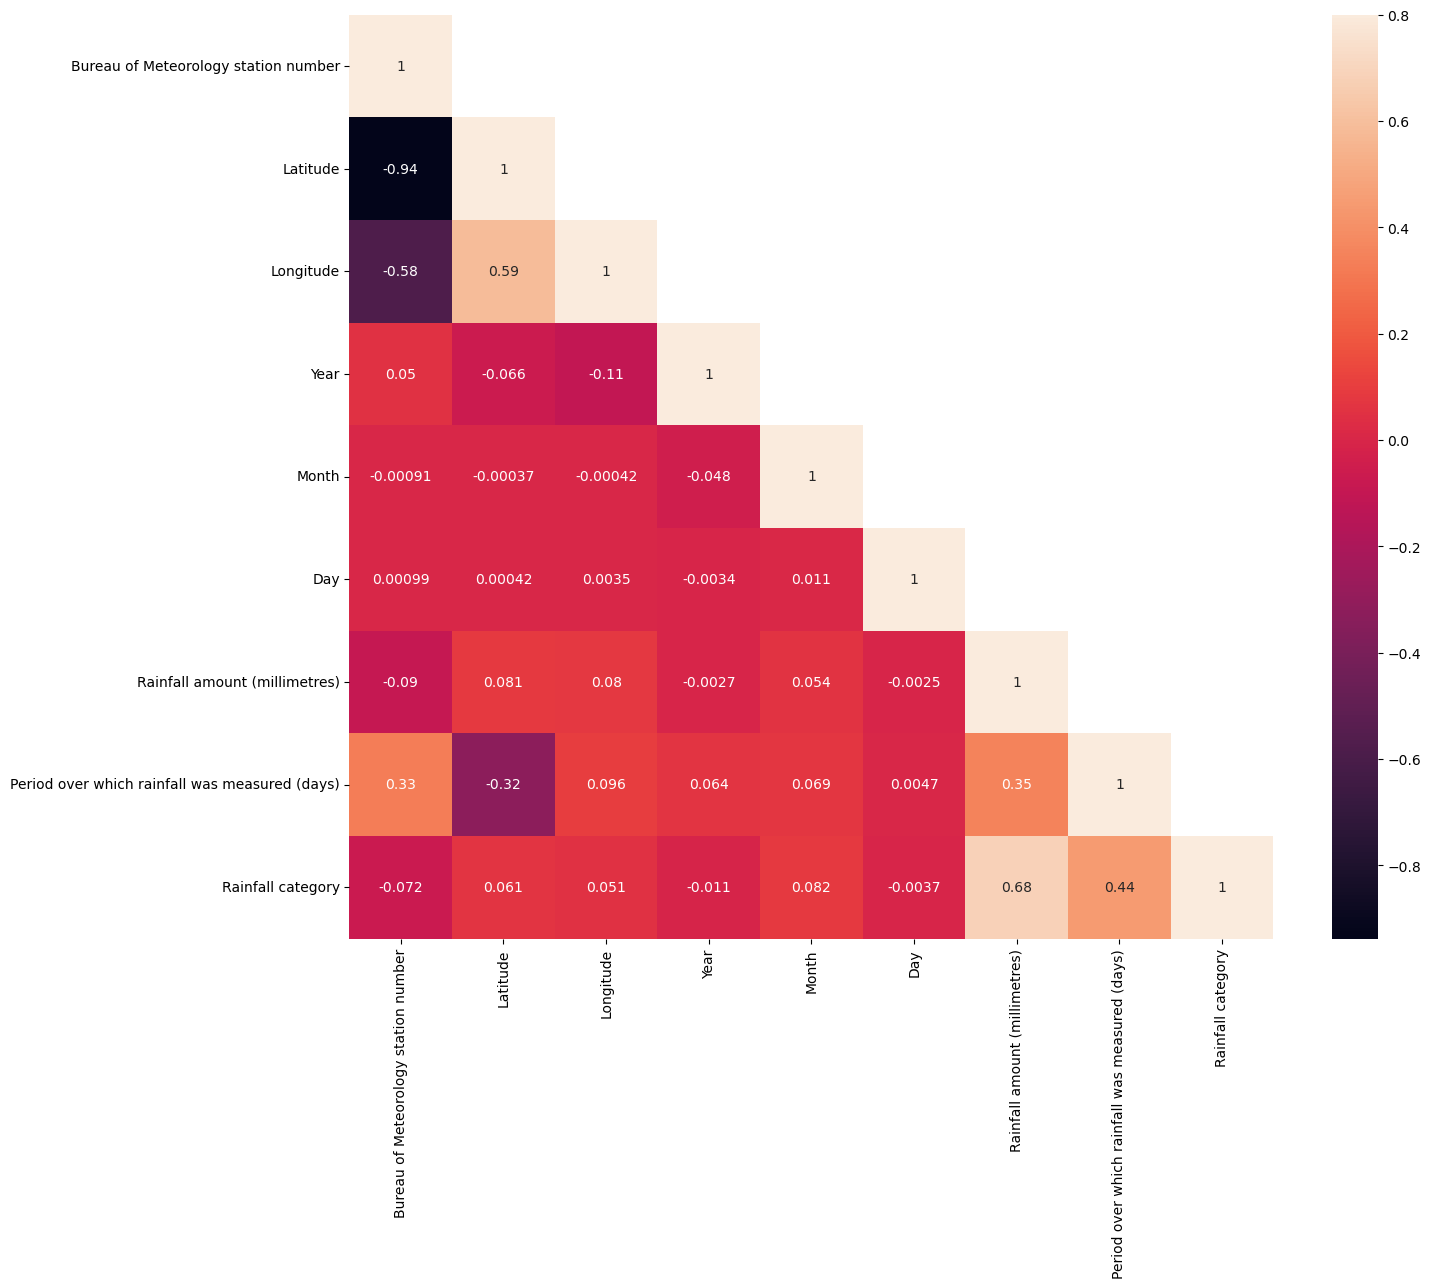

In [17]:
corrMatt=df.corr()
mask=np.array(corrMatt)
mask[np.tril_indices_from(mask)]=False
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(),mask=mask,vmax=.8, square=True, annot=True)
plt.show()

In [18]:
# Export dataframe to csv to utilise in Tableau and analysis notebook.
df.to_csv("data/rainfall.csv",index = False)

import plotly.express as px
import time

# Sample data (replace with your own data)
data = {
    'Latitude': [40.7128, 34.0522, 51.5074],
    'Longitude': [-74.0060, -118.2437, -0.1278],
    'ClusterLabel': [0, 1, 2],  # Initial cluster labels (from your ML model)
}

df = pd.DataFrame(data)

# Create an initial scatter plot
fig = px.scatter_geo(
    df, lat='Latitude', lon='Longitude', color='ClusterLabel',
    color_continuous_scale='Viridis',
    scope='world'
)
fig.show()

# Simulate model updates (replace with your own model training and updates)
for _ in range(10):
    # Simulate model updates (you should replace this with real model predictions)
    df['ClusterLabel'] = [0, 1, 2]  # Updated cluster labels
    
    # Update the Plotly figure
    fig.update_traces(marker=dict(size=10))
    fig.update_layout(autosize=True)
    
    # Display the updated figure
    fig.show()
    
    # Pause for a moment to simulate model updates (you can adjust the time as needed)
    time.sleep(2)

In [19]:
from jupyter_datatables import init_datatables_mode
%load_ext jupyter_require

%requirejs d3 https://d3js.org/d3.v5.min

In [20]:
init_datatables_mode()

In [21]:
pd.read_csv("data/rainfall.csv")

,Bureau of Meteorology station number,Location,Latitude,Longitude,Product code,Year,Month,Day,Rainfall amount (millimetres),Period over which rainfall was measured (days),Quality,Date,Rainfall category
0,86072,Monbulk,-37.88,145.42,IDCJAC0009,2012,1,1,0.0,0.0,Y,2012-01-01,0
1,86072,Monbulk,-37.88,145.42,IDCJAC0009,2012,1,2,0.0,0.0,Y,2012-01-02,0
2,86072,Monbulk,-37.88,145.42,IDCJAC0009,2012,1,3,0.0,0.0,Y,2012-01-03,0
3,86072,Monbulk,-37.88,145.42,IDCJAC0009,2012,1,4,4.2,1.0,Y,2012-01-04,1
4,86072,Monbulk,-37.88,145.42,IDCJAC0009,2012,1,5,1.0,1.0,Y,2012-01-05,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15499,86090,Warburton,-37.71,145.79,IDCJAC0009,2023,8,27,0.0,1.0,N,2023-08-27,0
15500,86090,Warburton,-37.71,145.79,IDCJAC0009,2023,8,28,0.0,1.0,N,2023-08-28,0
15501,86090,Warburton,-37.71,145.79,IDCJAC0009,2023,9,1,0.0,1.0,N,2023-09-01,0
15502,86090,Warburton,-37.71,145.79,IDCJAC0009,2023,9,2,0.0,1.0,N,2023-09-02,0
